<a href="https://colab.research.google.com/github/anitakumar/ml/blob/main/linear_regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn  import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [30]:

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])


(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [31]:
df= pd.DataFrame(housing.data)
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
#add features names
df.columns = housing.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
#find target
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [35]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


<Axes: >

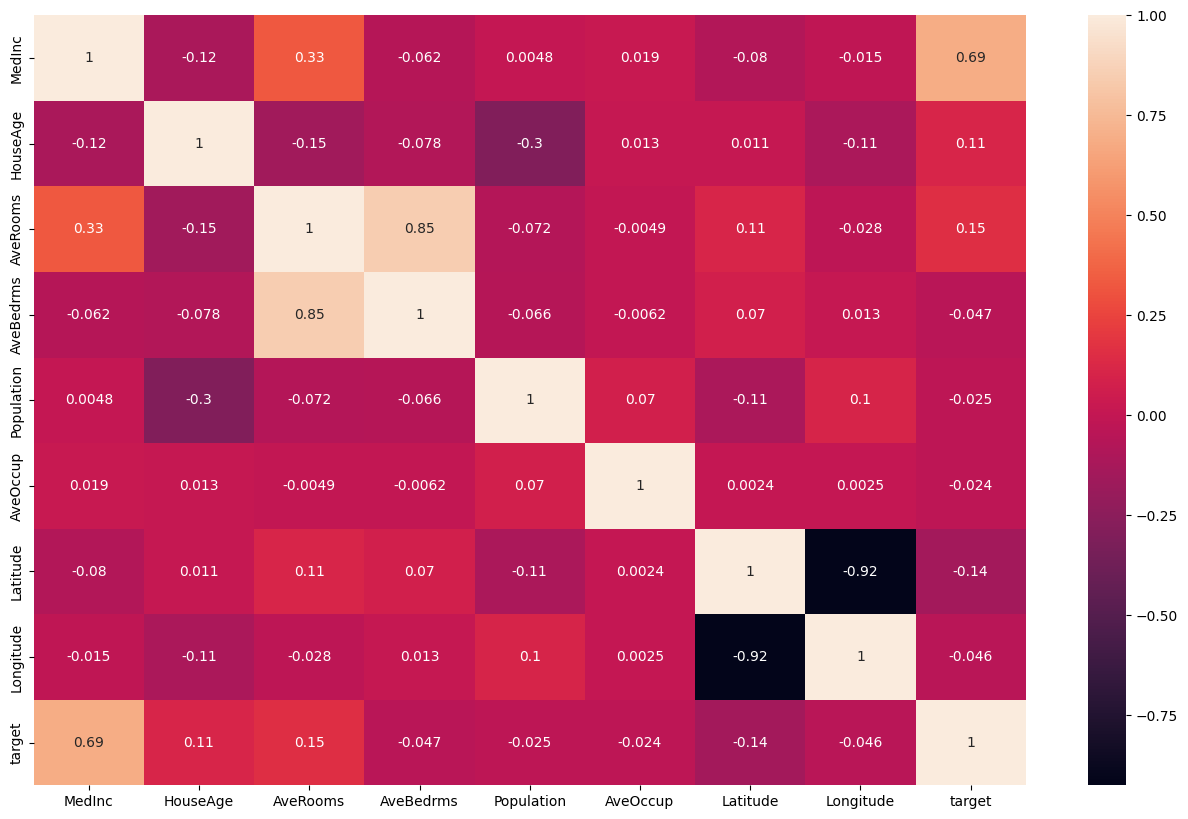

In [36]:
# prompt: #create a heat map for correclation

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)


In [37]:
# prompt: get all feature columns

X = df.drop('target', axis=1)
y = df['target']


In [38]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=100)

In [39]:
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-36.94192020718441
[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [41]:
# predictions  on test dataset
from math import sqrt # import sqrt function from math module
from sklearn.metrics import mean_squared_error # import mean_squared_error function from sklearn.metrics module
predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions))) # how similar are the number in ytest and prediction

0.706928968030143


In [42]:
## to quickly check how good is the rmse of our model ?
## try to use this genric thumb rule : rmse <= 10% mean(target)
print(0.1 * ytrain.mean())

0.20762338475913622


In [44]:
##Assessing the relevancy of the model
!pip install statsmodels
# import the statsmodels module
import statsmodels.api as sm

##Assessing the relevancy of the model

X2 = sm.add_constant(X)

est = sm.OLS(y, X2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:58:15   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

In [45]:
data= df.copy()

In [46]:
X1= data.drop(['target'], axis=1)
y1= data['target']

In [47]:
#drop population
X1= X1.drop(['Population'], axis=1)

In [48]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X1,y1,test_size=0.3,random_state=100)

In [50]:
lm = LinearRegression()
lm.fit(X1, y1)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-36.9175371197814
[ 0.43675975  0.00955547 -0.10713406  0.6449022  -0.00381933 -0.42069942
 -0.43404215]


In [51]:
# predictions  on test dataset
from math import sqrt # import sqrt function from math module
from sklearn.metrics import mean_squared_error # import mean_squared_error function from sklearn.metrics module
predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions))) # how similar are the number in ytest and prediction

0.7069393680427578


In [52]:
## to quickly check how good is the rmse of our model ?
## try to use this genric thumb rule : rmse <= 10% mean(target)
print(0.1 * ytrain.mean())

0.20762338475913622


In [54]:
##Assessing the relevancy of the model
!pip install statsmodels
# import the statsmodels module
import statsmodels.api as sm

##Assessing the relevancy of the model

X2 = sm.add_constant(X1)

est = sm.OLS(y1, X2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:05:49   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9175      0.658    -56.085      0.0

In [ ]:
# prompt: provide inference

# After removing the population, the R-squared value has increased slightly,
# indicating that the model has improved.
# Additionally, the p-value for all features is now below 0.05,
# suggesting that all features are statistically significant in predicting the target variable.
# The RMSE value has decreased, indicating that the model's predictions are now more accurate.
# Overall, removing the population feature has improved the model's performance.


In [59]:
data2= df.copy()

In [60]:
X2= data2.drop(['target','Latitude','Longitude'], axis=1)
y2= data2['target']

In [61]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X2,y2,test_size=0.3,random_state=100)

In [62]:
lm = LinearRegression()
lm.fit(X2, y2)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-0.43909342142814944
[ 5.36910326e-01  1.65033593e-02 -2.11740382e-01  9.93729775e-01
  2.21093787e-05 -4.87715048e-03]


In [63]:
# predictions  on test dataset
from math import sqrt # import sqrt function from math module
from sklearn.metrics import mean_squared_error # import mean_squared_error function from sklearn.metrics module
predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions))) # how similar are the number in ytest and prediction

0.7654939920277203


In [64]:
## to quickly check how good is the rmse of our model ?
## try to use this genric thumb rule : rmse <= 10% mean(target)
print(0.1 * ytrain.mean())

0.20762338475913622


In [65]:
##Assessing the relevancy of the model
!pip install statsmodels
# import the statsmodels module
import statsmodels.api as sm

##Assessing the relevancy of the model

X2 = sm.add_constant(X1)

est = sm.OLS(y1, X2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:21:17   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.0